# Autobahn-API der Autobahn GmbH - Autobahn Fakten in Deutschland (Stand 05.08.2025)


## Anzahl der Autobahnen in Deutschland

{"roads":["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A17","A19","A20","A21","A23","A24","A25","A27","A28","A29","A30","A31","A33","A36","A37","A38","A39","A40","A42","A43","A44","A45","A46","A48","A49","A52","A57","A59","A60","A60 ","A61","A62","A63","A64","A65","A66","A67","A70","A71","A72","A73","A81","A92","A93","A94","A95","A96","A98","A99","A100","A111","A113","A115","A117","A143","A210","A215","A226","A261","A281","A293","A320","A352","A369","A391","A445","A448","A480","A485","A516","A524","A542","A544","A553","A555","A559","A560","A562","A565","A573","A602","A620","A623","A640","A643","A648","A650","A656","A659","A661","A671","A861","A952","A980","A995","A99a"]}
Es gibt insgesamt so viele Autobahnen in Deutschland: 111


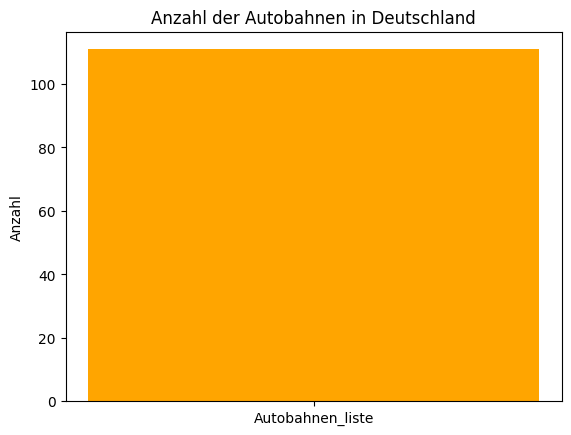

In [10]:

import requests
import matplotlib.pyplot as plt
import seaborn as sns

res=requests.get("https://verkehr.autobahn.de/o/autobahn/")

print(res.text)

data_autobahn=res.json()


#Wie viele Autobahnen gibt es in Deutschland?#
print("Es gibt insgesamt so viele Autobahnen in Deutschland:",len(data_autobahn["roads"]))

Autobahnen_liste=data_autobahn["roads"]

plt.bar(["Autobahnen_liste"],len(data_autobahn["roads"]),color="orange")
plt.ylabel('Anzahl')
plt.title('Anzahl der Autobahnen in Deutschland')
plt.show()


## Wie viele Baustellen gibt es auf einer bestimmten Autobahn (z.B. A3)?

Auf der Autobahn A3 gibt es momentan: 157 Baustellen


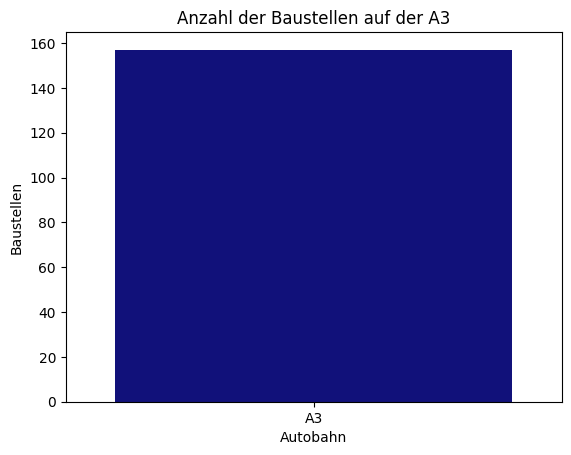

In [16]:
import pandas as pd

res_baustellen=requests.get("https://verkehr.autobahn.de/o/autobahn/A3/services/roadworks")

data_baustellen=res_baustellen.json()

anzahl_baustellen_A3=len((data_baustellen["roadworks"]))

print("Auf der Autobahn A3 gibt es momentan:", anzahl_baustellen_A3, "Baustellen")


# DataFrame zum Plotten
df = pd.DataFrame({
    "Autobahn": ["A3"],
    "Baustellen": [anzahl_baustellen_A3]
})

# Balkendiagramm zeichnen
sns.barplot(data=df, x="Autobahn", y="Baustellen", color="darkblue")
plt.title("Anzahl der Baustellen auf der A3")
plt.show()



# Wie viele Baustellen gibt es jeweils auf den Autobahnen in Deutschland?

In [15]:
gesamt_baustellen = 0

for Autobahn in Autobahnen_liste:
    url = f"https://verkehr.autobahn.de/o/autobahn/{Autobahn}/services/roadworks"
    res_baustellen = requests.get(url)
    
    if res_baustellen.status_code == 200:
        data_baustellen = res_baustellen.json()
        anzahl = len(data_baustellen.get("roadworks", []))
        print(f"Baustellen auf {Autobahn}: {anzahl}")
        gesamt_baustellen += anzahl
    else:
        print(f"Fehler beim Abrufen der Baustellen für {Autobahn}")

    



Baustellen auf A1: 220
Baustellen auf A2: 95
Baustellen auf A3: 157
Baustellen auf A4: 143
Baustellen auf A5: 111
Baustellen auf A6: 76
Baustellen auf A7: 165
Baustellen auf A8: 172
Baustellen auf A9: 101
Baustellen auf A10: 51
Baustellen auf A11: 7
Baustellen auf A12: 2
Baustellen auf A13: 32
Baustellen auf A14: 46
Baustellen auf A15: 4
Baustellen auf A17: 9
Baustellen auf A19: 23
Baustellen auf A20: 25
Baustellen auf A21: 6
Baustellen auf A23: 7
Baustellen auf A24: 25
Baustellen auf A25: 3
Baustellen auf A27: 37
Baustellen auf A28: 10
Baustellen auf A29: 14
Baustellen auf A30: 31
Baustellen auf A31: 16
Baustellen auf A33: 12
Baustellen auf A36: 4
Baustellen auf A37: 3
Baustellen auf A38: 18
Baustellen auf A39: 30
Baustellen auf A40: 27
Baustellen auf A42: 56
Baustellen auf A43: 52
Baustellen auf A44: 68
Baustellen auf A45: 130
Baustellen auf A46: 71
Baustellen auf A48: 11
Baustellen auf A49: 13
Baustellen auf A52: 32
Baustellen auf A57: 28
Baustellen auf A59: 37
Baustellen auf A60: 1

# Wie viele Baustellen gibt es insgesamt auf allen Autobahnen (Stand 05.08.2025)?

In [31]:
print(f"Gesamtanzahl der Baustellen auf allen Autobahnen: {gesamt_baustellen}")



Gesamtanzahl der Baustellen auf allen Autobahnen: 2698


## WIe viele Baustellen gibt es durchschnittlich pro Autobahn in Deutschland (Stand 05.08.2025)

In [32]:
durchschnitt=(gesamt_baustellen/len(data_autobahn["roads"]))


print(f"Es existieren im Durchschnitt {durchschnitt:.2f} Baustellen pro Autobahn")

Es existieren im Durchschnitt 24.31 Baustellen pro Autobahn


## Raststätte auf den Autobahnen

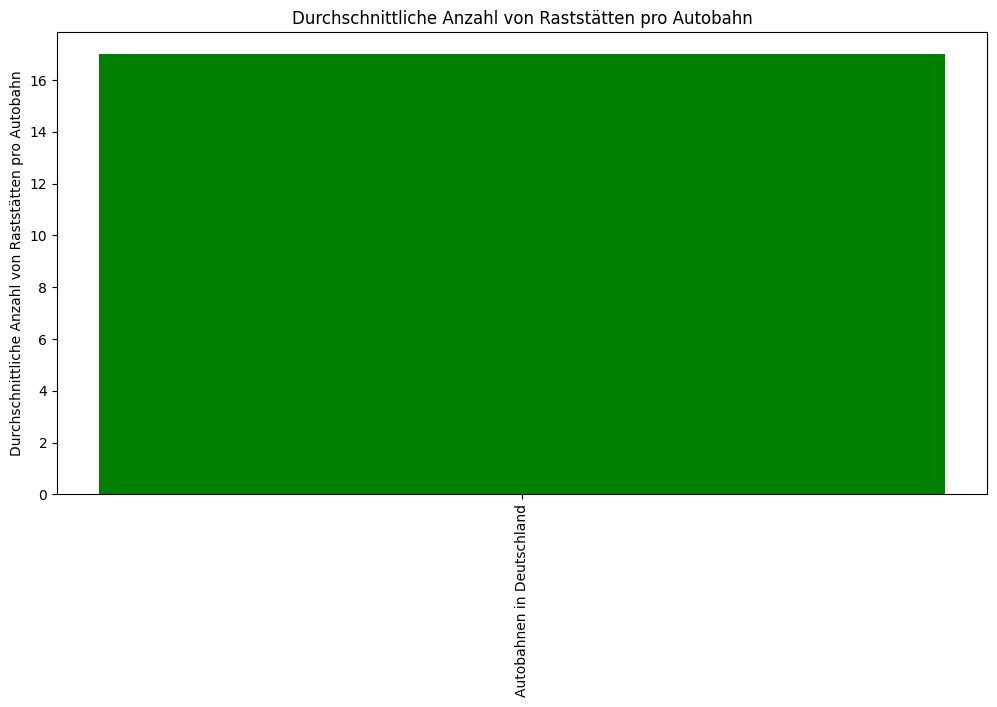

Es gibt insgesamt folgende Anzahl an Raststätten auf den Autobahnen: 1887
Es gibt folgende Anzahl an Autobahnen: 111
Das macht im Durchschnitt 17.0 Raststätte pro Autobahn


In [34]:
Anzahl_raststätte=0

for Autobahn in Autobahnen_liste:
    url=f"https://verkehr.autobahn.de/o/autobahn/{Autobahn}/services/parking_lorry"
    res_rastplätze=requests.get(url)
    data_raststätte=res_rastplätze.json()
    Anzahl_raststätte += len(data_raststätte.get("parking_lorry", []))


anzahl_raststaetten_pro_autobahn=Anzahl_raststätte/len(data_autobahn["roads"])

plt.figure(figsize=(12,6))
plt.bar("Autobahnen in Deutschland", anzahl_raststaetten_pro_autobahn, color='green')
plt.ylabel('Durchschnittliche Anzahl von Raststätten pro Autobahn')
plt.title('Durchschnittliche Anzahl von Raststätten pro Autobahn')
plt.xticks(rotation=90)
plt.show()



print("Es gibt insgesamt folgende Anzahl an Raststätten auf den Autobahnen:", Anzahl_raststätte)
print("Es gibt folgende Anzahl an Autobahnen:", len(data_autobahn["roads"])) 
print("Das macht im Durchschnitt", Anzahl_raststätte/len(data_autobahn["roads"]), "Raststätte pro Autobahn")


## Fazit

In [42]:
# Fazit: 
print("Fazit:")
print("Es gibt folgende Anzahl an Autobahnen:", len(data_autobahn["roads"])) 
print(f"Gesamtanzahl der Baustellen auf allen Autobahnen: {gesamt_baustellen}")
print(f"Es existieren im Durchschnitt {durchschnitt:.2f} Baustellen pro Autobahn")
print("Es gibt insgesamt folgende Anzahl an Raststätten auf den Autobahnen:", Anzahl_raststätte)
print("Das macht im Durchschnitt", Anzahl_raststätte/len(data_autobahn["roads"]), "Raststätte pro Autobahn")

Fazit:
Es gibt folgende Anzahl an Autobahnen: 111
Gesamtanzahl der Baustellen auf allen Autobahnen: 2698
Es existieren im Durchschnitt 24.31 Baustellen pro Autobahn
Es gibt insgesamt folgende Anzahl an Raststätten auf den Autobahnen: 1887
Das macht im Durchschnitt 17.0 Raststätte pro Autobahn






## Vielen Dank für Ihre Aufmerksamkeit!